In [127]:
import matplotlib.pyplot as plot
import matplotlib.style as plot_style
from IPython.display import Audio
import librosa
import numpy as np
import librosa.display

In [141]:
example_song_filename = librosa.util.example_audio_file()               # audio sample
my_song_filename = '/home/miczima/Music/nieboo.wav'

y, sr = librosa.load(my_song_filename) #, offset=0.0, duration=20.0) # just a fragment

# Short Fast Fourier Transform, we decreased the power using the power of 1.5 (example: 0.5 ** 1.5 = 0.353)
spectogram = np.abs(librosa.stft(y, n_fft=512)**2)


melspec = librosa.feature.melspectrogram(S=spectogram)
#melspec = librosa.feature.melspectrogram(y=y,sr=sr)

chroma = librosa.feature.chroma_cqt(y=y,sr=sr)

tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

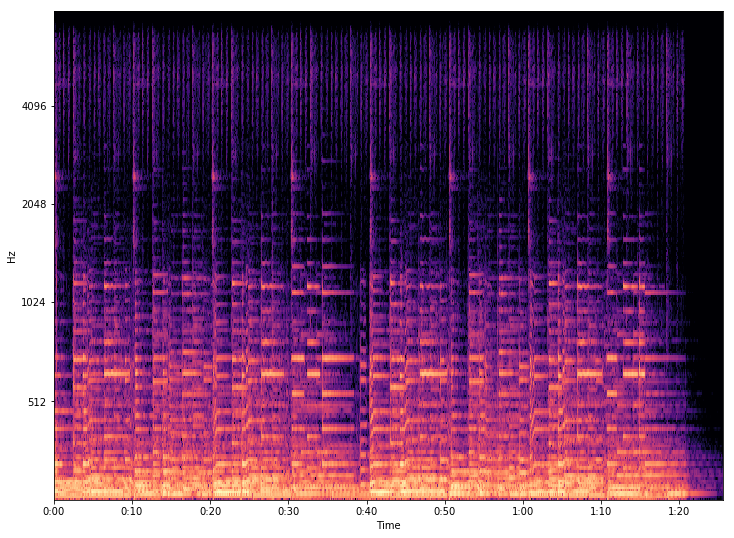

In [143]:
plot.rcParams["figure.figsize"] = [12, 9]
librosa.display.specshow(librosa.power_to_db(spectogram, ref=np.max), y_axis='mel', x_axis='time', fmax=8000)
plot.show()

### Mel spectogram in audacity, just for comparison

mel_spectogram_mono_192kHZ_32768.png |  mel_spectogram_mono_22kHZ_512.png
:-------------------------:|:-------------------------:
![](mel_spectogram_mono_192kHZ_32768.png)  |  ![](mel_spectogram_mono_22kHZ_512.png)

#### It seems like the right hand side plot is quite similar to our specshow
#### It should be ;) because the parameters are
<hr>
### Spectogram preferences

mel_spectogram_preferences_192kHZ.png |  mel_spectogram_preferences_22kHZ.png
:-------------------------:|:-------------------------:
![](mel_spectogram_preferences_192kHZ.png)  |  ![](mel_spectogram_preferences_22kHZ.png)

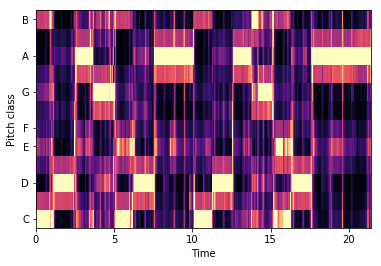

In [130]:
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plot.show()

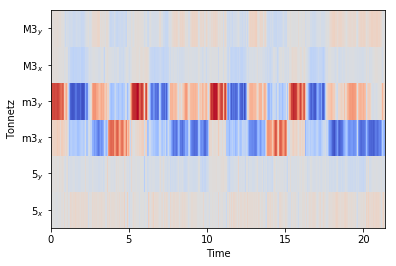

In [131]:
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time')
plot.show()

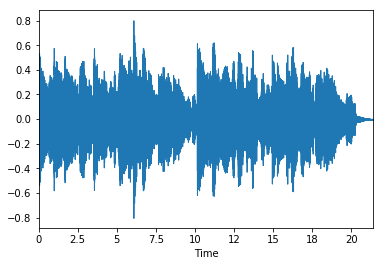

In [132]:
librosa.display.waveplot(y, sr=sr)
plot.show()

In [133]:
# Detecting how many beats per minute is in audio

tempo, frames = librosa.beat.beat_track(y=y, sr=sr)

# Tempo is in BPM => beats per minute, frames => each element is audio's window index with increased strength
print("Calculated tempo: ", tempo)
print("Beats as (frame, second): ")
for index, (frame, second) in enumerate(zip(frames, librosa.frames_to_time(frames, sr=sr))):
    print("beat", index % 4, "=> (", frame, "," ,second,")")

Calculated tempo:  95.703125
Beats as (frame, second): 
beat 0 => ( 3 , 0.0696598639456 )
beat 1 => ( 29 , 0.673378684807 )
beat 2 => ( 57 , 1.32353741497 )
beat 3 => ( 85 , 1.97369614512 )
beat 0 => ( 112 , 2.60063492063 )
beat 1 => ( 138 , 3.2043537415 )
beat 2 => ( 166 , 3.85451247166 )
beat 3 => ( 193 , 4.48145124717 )
beat 0 => ( 221 , 5.13160997732 )
beat 1 => ( 247 , 5.73532879819 )
beat 2 => ( 275 , 6.38548752834 )
beat 3 => ( 302 , 7.01242630385 )
beat 0 => ( 330 , 7.66258503401 )
beat 1 => ( 356 , 8.26630385488 )
beat 2 => ( 383 , 8.89324263039 )
beat 3 => ( 410 , 9.5201814059 )
beat 0 => ( 437 , 10.1471201814 )
beat 1 => ( 465 , 10.7972789116 )
beat 2 => ( 492 , 11.4242176871 )
beat 3 => ( 520 , 12.0743764172 )
beat 0 => ( 547 , 12.7013151927 )
beat 1 => ( 574 , 13.3282539683 )
beat 2 => ( 601 , 13.9551927438 )
beat 3 => ( 629 , 14.6053514739 )
beat 0 => ( 657 , 15.2555102041 )
beat 1 => ( 683 , 15.8592290249 )
beat 2 => ( 710 , 16.4861678005 )
beat 3 => ( 737 , 17.113106576

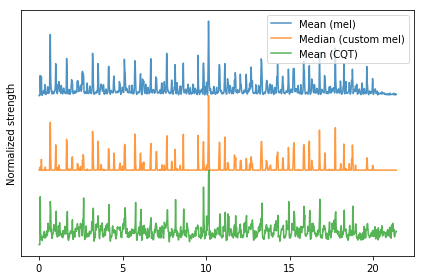

In [134]:
# Detecting accents in audio


D = librosa.stft(y)
times = librosa.frames_to_time(np.arange(D.shape[1])) # TODO what is happening here?

# Mean
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
plot.plot(times, 2 + onset_env / onset_env.max(), alpha=0.8, label='Mean (mel)')

# Median
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median, fmax=8000, n_mels=256)
plot.plot(times, 1 + onset_env / onset_env.max(), alpha=0.8, label='Median (custom mel)')

# Mean with varaible window size, focused on pitch -> TODO don't know what it works
onset_env = librosa.onset.onset_strength(y=y, sr=sr, feature=librosa.cqt)
plot.plot(times, onset_env / onset_env.max(), alpha=0.8, label='Mean (CQT)')

# Finally draw our plots at once
plot.legend(frameon=True, framealpha=0.75)
plot.ylabel('Normalized strength')
plot.yticks([])
plot.axis('tight')
plot.tight_layout()
plot.show()

# You should see, how nice is the second one(median) -> TODO why is that?